In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pprint
import pandas as pd
%pylab inline
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


# The following section uses no evidence in inference for the initial starting products

# Plot Confidence intervals for product LTVs

In [4]:
clients_over_time_per_week_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_all_clients")
cumulative_clients_over_time_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management")
rev_customer_cm_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking")
rev_customer_checking_no_evidence  = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma ")
rev_customer_cmma_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep")
rev_customer_es_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx")
rev_customer_fx_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit ")
rev_customer_loc_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_money_market_bonus")
rev_customer_mmb_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_no_evidence =  pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_money_market_bonus_total_weekly_rev")



# Plot the total number of clients over time

In [268]:
cumulative_clients_week_0_no_evidence = defaultdict(list)
cumulative_clients_week_1_no_evidence = defaultdict(list)
cumulative_clients_week_2_no_evidence = defaultdict(list)
cumulative_clients_week_0_final = []
cumulative_clients_week_1_final = []
cumulative_clients_week_2_final = []
[cumulative_clients_week_0_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[0]]
[cumulative_clients_week_1_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[1]]
[cumulative_clients_week_2_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[2]]
for k,v in cumulative_clients_week_0_no_evidence.items():
    cumulative_clients_week_0_final.append(max(v))
for k,v in cumulative_clients_week_1_no_evidence.items():
    cumulative_clients_week_1_final.append(max(v))  
for k,v in cumulative_clients_week_2_no_evidence.items():
    cumulative_clients_week_2_final.append(max(v)) 
final_cumulative_clients_no_evidence = [cumulative_clients_week_0_final
                                        ,cumulative_clients_week_1_final,cumulative_clients_week_2_final]

In [269]:
final_cumulative_clients_no_evidence = [cumulative_clients_week_0_final
                                        ,cumulative_clients_week_1_final,cumulative_clients_week_2_final]

In [276]:
final_cumulative_clients_no_evidence[2][-1]

1068

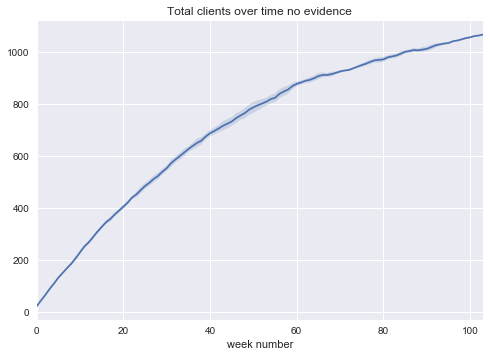

In [271]:
sns.tsplot(final_cumulative_clients_no_evidence)
plt.title('Total clients over time no evidence')
plt.xlabel('week number')

# Plot the confidence intervals of the percent of people per product over time 
## No evidence about products given

In [186]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_no_evidence_final = []
cumulative_checking_customers_percent_no_evidence_final = []
cumulative_cmma_customers_percent_no_evidence_final = []
cumulative_es_customers_percent_no_evidence_final = []
cumulative_fx_customers_percent_no_evidence_final = []
cumulative_loc_customers_percent_no_evidence_final = []
cumulative_mmb_customers_percent_no_evidence_final = []

In [187]:
for simulation_cm,simulation_total in zip(cumulative_cm_customers_no_evidence,final_cumulative_clients_no_evidence) :
    cumulative_cm_customers_percent_no_evidence_final.append([i[2]/z for i,z in zip(simulation_cm,simulation_total)])

In [188]:
for simulation_checking,simulation_total in zip(cumulative_checking_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_checking_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])

In [189]:
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_cmma_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])

In [190]:
for simulation_es,simulation_total in zip(cumulative_es_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_es_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])

In [191]:
for simulation_fx,simulation_total in zip(cumulative_fx_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_fx_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])

In [192]:
for simulation_loc,simulation_total in zip(cumulative_loc_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_loc_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])

In [193]:
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_mmb_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])

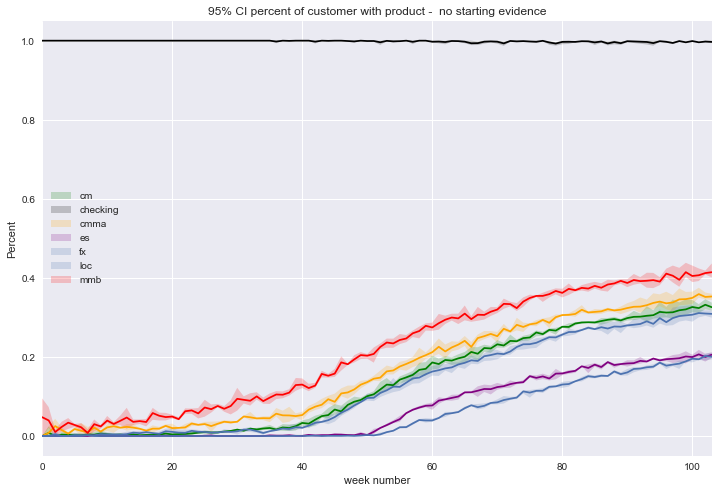

In [219]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_no_evidence_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_no_evidence_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_no_evidence_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_no_evidence_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_no_evidence_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  no starting evidence')

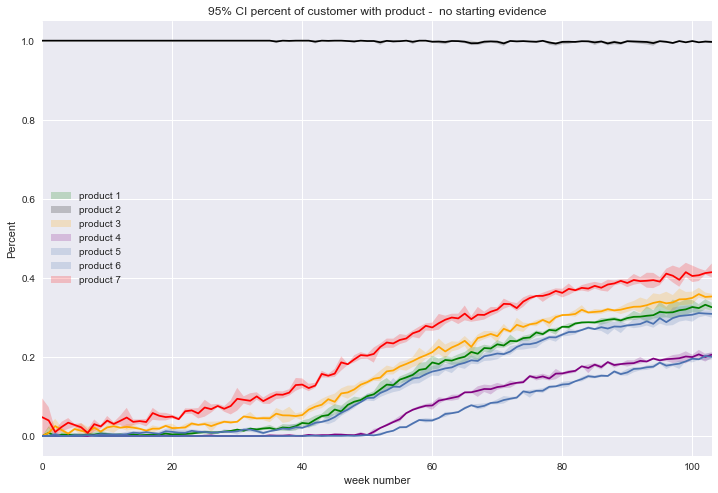

In [391]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'product 1',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_no_evidence_final, value = 'product 2',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_no_evidence_final,value='product 3',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_no_evidence_final,value='product 4',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_no_evidence_final,value='product 5',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_no_evidence_final,value='product 6',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_no_evidence_final,value='product 7',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['product 1','product 2','product 3','product 4','product 5','product 6','product 7'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  no starting evidence')

# Plot Revenue per product per client (time adjusted) over time
## No starting evidence

In [209]:
cumulative_cm_rev_per_customer_no_evidence_final = []
cumulative_checking_rev_per_customer_no_evidence_final = []
cumulative_cmma_rev_per_customer_no_evidence_final = []
cumulative_es_rev_per_customer_no_evidence_final = []
cumulative_fx_rev_per_customer_no_evidence_final = []
cumulative_loc_rev_per_customer_no_evidence_final = []
cumulative_mmb_rev_per_customer_no_evidence_final = []

In [210]:
for simulation in rev_customer_cm_no_evidence:
    cumulative_cm_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [211]:
for simulation in rev_customer_checking_no_evidence:
    cumulative_checking_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [212]:
for simulation in rev_customer_cmma_no_evidence:
    cumulative_cmma_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [213]:
for simulation in rev_customer_es_no_evidence:
    cumulative_es_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [214]:
for simulation in rev_customer_fx_no_evidence:
    cumulative_fx_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [215]:
for simulation in rev_customer_loc_no_evidence:
    cumulative_loc_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [216]:
for simulation in rev_customer_mmb_no_evidence:
    cumulative_mmb_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

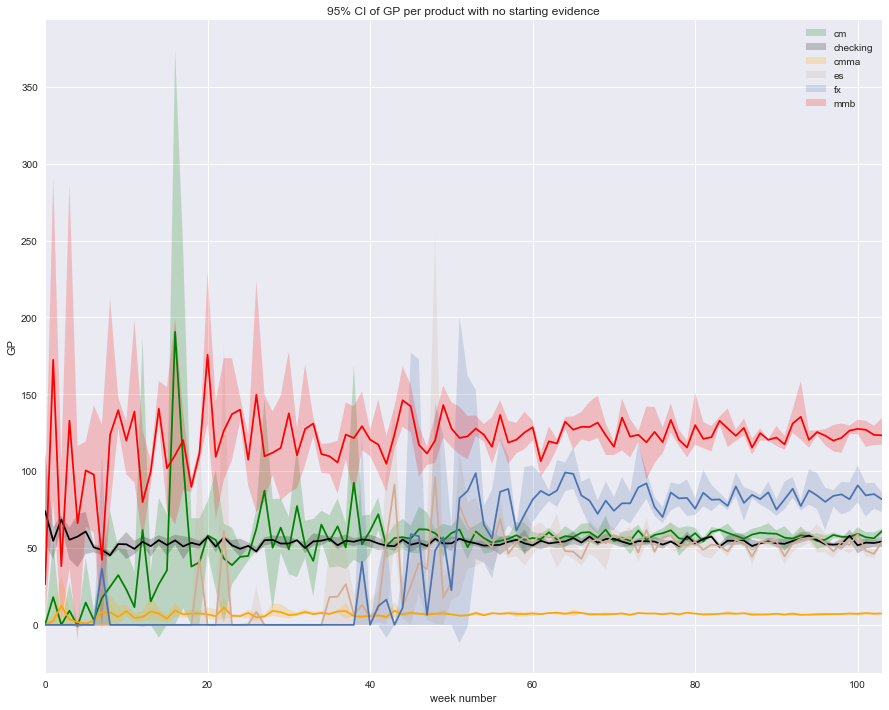

In [246]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_no_evidence_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_no_evidence_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_no_evidence_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_no_evidence_final,value='fx',ci=95)
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_no_evidence_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product with no starting evidence')

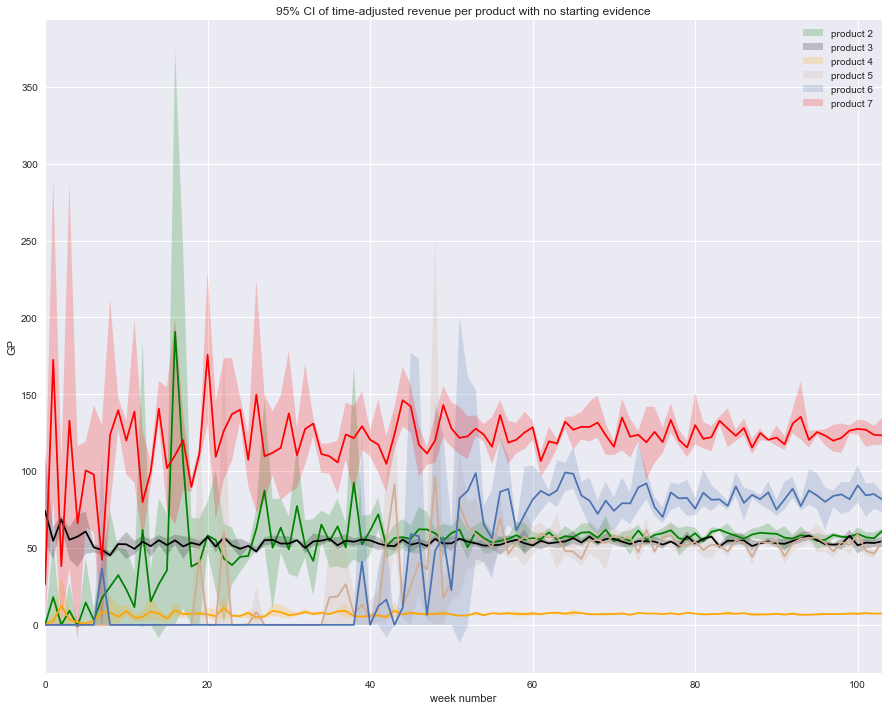

In [394]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'product 7',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_no_evidence_final, value = 'product 6',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_no_evidence_final,value='product 5',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_no_evidence_final,value='product 4',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_no_evidence_final,value='product 3',ci=95)
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_no_evidence_final,value='product 2',ci=95, color ='red')


plt.legend(['product 2','product 3','product 4','product 5','product 6','product 7'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of time-adjusted revenue per product with no starting evidence')

In [326]:
print('Mean CM GP for last period = {}'.format(mean([cumulative_cm_rev_per_customer_no_evidence_final[0][-1],
        cumulative_cm_rev_per_customer_no_evidence_final[1][-1],
        cumulative_cm_rev_per_customer_no_evidence_final[2][-1]])))

Mean CM for last period = 61.04760367698983


In [327]:
print('Mean Checking GP for last period = {}'.format(mean([cumulative_checking_rev_per_customer_no_evidence_final[0][-1],
        cumulative_checking_rev_per_customer_no_evidence_final[1][-1],
        cumulative_checking_rev_per_customer_no_evidence_final[2][-1]])))

Mean Checking for last period = 54.24292780560362


In [328]:
print('Mean cmma GP for last period = {}'.format(mean([cumulative_cmma_rev_per_customer_no_evidence_final[0][-1],
        cumulative_cmma_rev_per_customer_no_evidence_final[1][-1],
        cumulative_cmma_rev_per_customer_no_evidence_final[2][-1]])))

Mean cmma GP for last period = 7.4211817836389935


In [329]:
print('Mean es GP for last period = {}'.format(mean([cumulative_es_rev_per_customer_no_evidence_final[0][-1],
        cumulative_es_rev_per_customer_no_evidence_final[1][-1],
        cumulative_es_rev_per_customer_no_evidence_final[2][-1]])))

Mean es GP for last period = 53.97176665760401


In [330]:
print('Mean fx GP for last period = {}'.format(mean([cumulative_fx_rev_per_customer_no_evidence_final[0][-1],
        cumulative_fx_rev_per_customer_no_evidence_final[1][-1],
        cumulative_fx_rev_per_customer_no_evidence_final[2][-1]])))

Mean fx GP for last period = 81.63709381873565


In [331]:
print('Mean loc GP for last period = {}'.format(mean([cumulative_loc_rev_per_customer_no_evidence_final[0][-1],
        cumulative_loc_rev_per_customer_no_evidence_final[1][-1],
        cumulative_loc_rev_per_customer_no_evidence_final[2][-1]])))

Mean loc GP for last period = 6913.272899249615


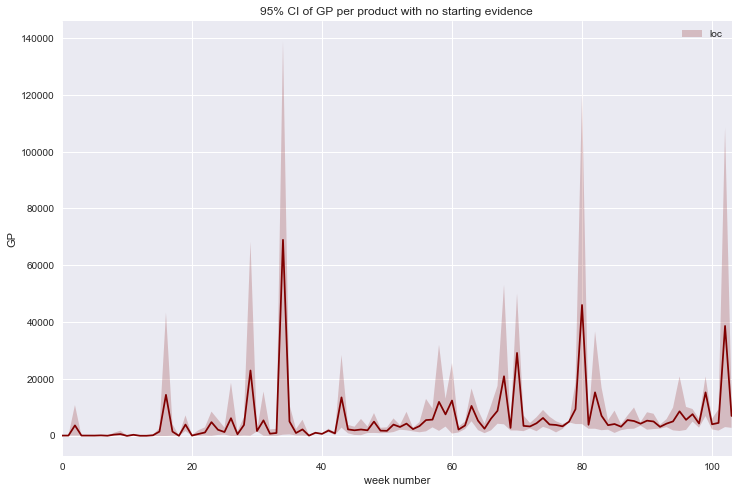

In [240]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95,color='maroon')
plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product with no starting evidence')

# Next, look at the results from each client starting with checking and cm product

In [295]:
clients_over_time_per_week_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking")
rev_customer_checking_evidence_checking_cm  = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx")
rev_customer_fx_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_cm =  pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_money_market_bonus_total_weekly_rev")



In [296]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_1_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_2_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_cm = []
cumulative_clients_week_1_final_evid_checking_cm = []
cumulative_clients_week_2_final_evid_checking_cm = []
[cumulative_clients_week_0_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[0]]
[cumulative_clients_week_1_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[1]]
[cumulative_clients_week_2_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[2]]
for k,v in cumulative_clients_week_0_evidence_checking_cm.items():
    cumulative_clients_week_0_final_evid_checking_cm.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_cm.items():
    cumulative_clients_week_1_final_evid_checking_cm.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_cm.items():
    cumulative_clients_week_2_final_evid_checking_cm.append(max(v)) 
final_cumulative_clients_evidence_checking_cm = [cumulative_clients_week_0_final_evid_checking_cm
                                        ,cumulative_clients_week_1_final_evid_checking_cm,
                                        cumulative_clients_week_2_final_evid_checking_cm]

In [297]:
final_cumulative_clients_evidence_checking_cm[2][-1]

1051

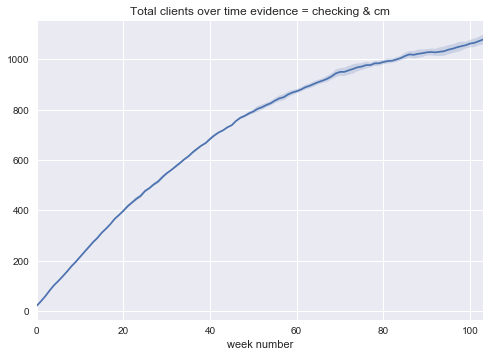

In [298]:
sns.tsplot(final_cumulative_clients_evidence_checking_cm)
plt.title('Total clients over time evidence = checking & cm')
plt.xlabel('week number')

## Percent of people with each product

In [299]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_cm_final = []
cumulative_checking_customers_percent_evidence_checking_cm_final = []
cumulative_cmma_customers_percent_evidence_checking_cm_final = []
cumulative_es_customers_percent_evidence_checking_cm_final = []
cumulative_fx_customers_percent_evidence_checking_cm_final = []
cumulative_loc_customers_percent_evidence_checking_cm_final = []
cumulative_mmb_customers_percent_evidence_checking_cm_final = []

In [300]:
for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_fx_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])

In [301]:
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_cm_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])

In [302]:
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_loc_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])

In [303]:
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_checking_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])

In [304]:
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_cmma_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])

In [305]:
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_es_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])

In [306]:
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_mmb_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])

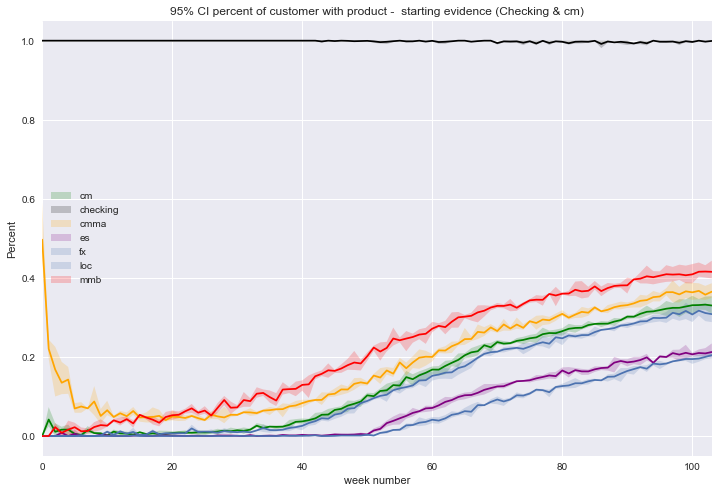

In [307]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_cm_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_cm_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_cm_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_cm_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_cm_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_cm_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_cm_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & cm)')

## Revenue per product time adjusted

In [312]:
cumulative_cm_rev_per_customer_evidence_checking_cm_final = []
cumulative_checking_rev_per_customer_evidence_checking_cm_final = []
cumulative_cmma_rev_per_customer_evidence_checking_cm_final = []
cumulative_es_rev_per_customer_evidence_checking_cm_final = []
cumulative_fx_rev_per_customer_evidence_checking_cm_final = []
cumulative_loc_rev_per_customer_evidence_checking_cm_final = []
cumulative_mmb_rev_per_customer_evidence_checking_cm_final = []

In [313]:
for simulation in rev_customer_cm_evidence_checking_cm:
    cumulative_cm_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_cm:
    cumulative_checking_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_cm:
    cumulative_cmma_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_cm:
    cumulative_es_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_cm:
    cumulative_fx_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_cm:
    cumulative_loc_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_cm:
    cumulative_mmb_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])

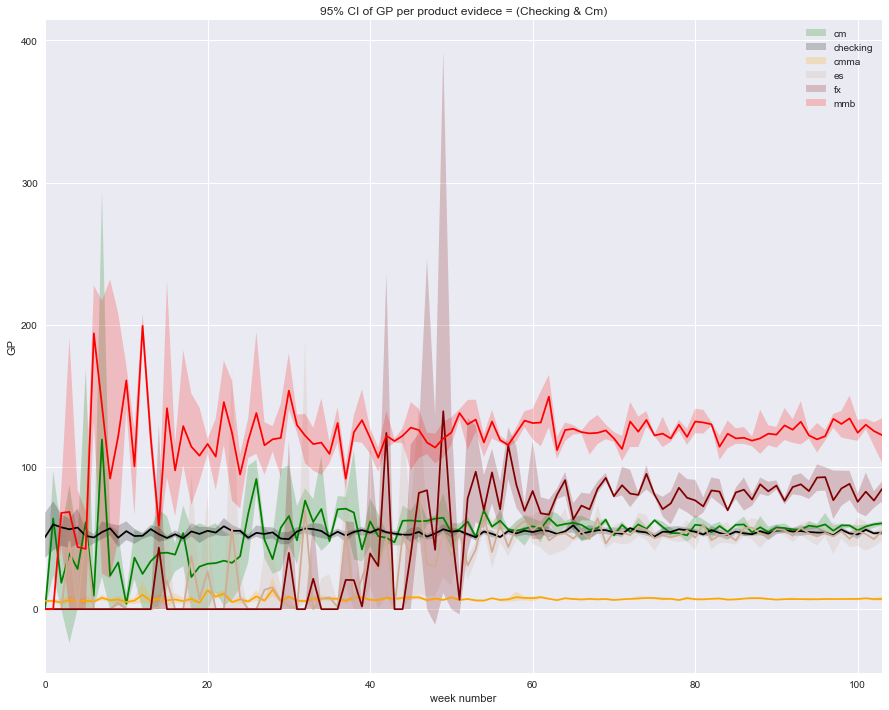

In [317]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_cm_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_cm_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_cm_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_cm_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_cm_final,value='fx',ci=95,color='maroon')
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_cm_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_cm_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & Cm)')

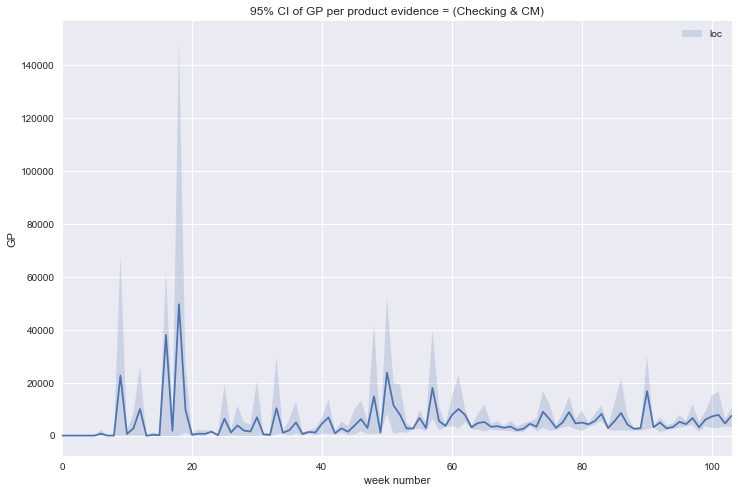

In [320]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_cm_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & CM)')

In [333]:
print('Mean CM GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_cm_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_cm_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_cm_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean CM GP for last period (evid = checking , cm) = 60.361483800467376


In [334]:
print('Mean Checking GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_checking_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_checking_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_checking_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean Checking GP for last period (evid = checking , cm) = 53.8949778865875


In [335]:
print('Mean cmma GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_cmma_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_cmma_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_cmma_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean cmma GP for last period (evid = checking , cm) = 7.170256210942615


In [336]:
print('Mean es GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_es_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_es_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_es_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean es GP for last period (evid = checking , cm) = 55.01626726415463


In [337]:
print('Mean fx GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_fx_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_fx_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_fx_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean fx GP for last period (evid = checking , cm) = 84.56950049172676


In [338]:
print('Mean loc GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_loc_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_loc_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_loc_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean loc GP for last period (evid = checking , cm) = 7476.610331652569


# Next, starting evidence of checking & mmb

In [339]:
clients_over_time_per_week_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking")
rev_customer_checking_evidence_checking_mmb  = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx")
rev_customer_fx_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_mmb =  pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_money_market_bonus_total_weekly_rev")



In [340]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_1_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_2_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_mmb = []
cumulative_clients_week_1_final_evid_checking_mmb = []
cumulative_clients_week_2_final_evid_checking_mmb = []
[cumulative_clients_week_0_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[0]]
[cumulative_clients_week_1_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[1]]
[cumulative_clients_week_2_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[2]]
for k,v in cumulative_clients_week_0_evidence_checking_mmb.items():
    cumulative_clients_week_0_final_evid_checking_mmb.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_mmb.items():
    cumulative_clients_week_1_final_evid_checking_mmb.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_mmb.items():
    cumulative_clients_week_2_final_evid_checking_mmb.append(max(v)) 
final_cumulative_clients_evidence_checking_mmb = [cumulative_clients_week_0_final_evid_checking_mmb
                                        ,cumulative_clients_week_1_final_evid_checking_mmb,
                                        cumulative_clients_week_2_final_evid_checking_mmb]

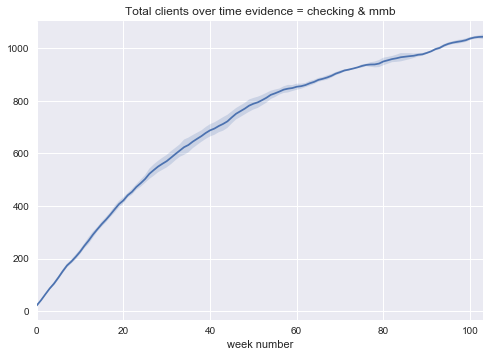

In [341]:
sns.tsplot(final_cumulative_clients_evidence_checking_mmb)
plt.title('Total clients over time evidence = checking & mmb')
plt.xlabel('week number')

## Percent of people with each product given evidence  = checking & mmb

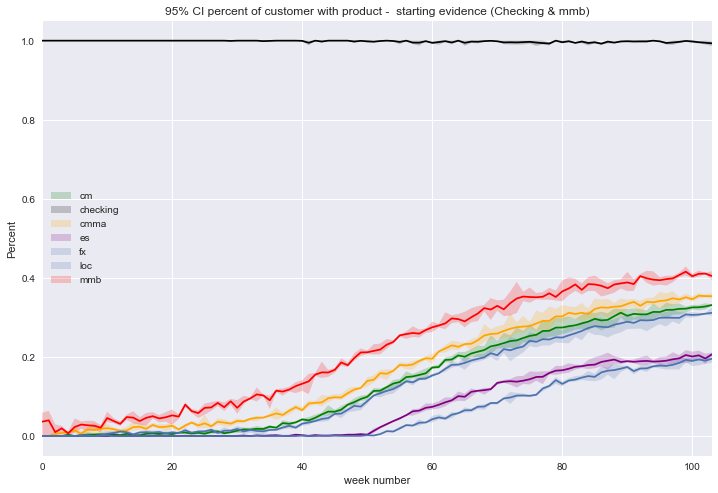

In [342]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_mmb_final = []
cumulative_checking_customers_percent_evidence_checking_mmb_final = []
cumulative_cmma_customers_percent_evidence_checking_mmb_final = []
cumulative_es_customers_percent_evidence_checking_mmb_final = []
cumulative_fx_customers_percent_evidence_checking_mmb_final = []
cumulative_loc_customers_percent_evidence_checking_mmb_final = []
cumulative_mmb_customers_percent_evidence_checking_mmb_final = []


for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_fx_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_cm_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_loc_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_checking_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_cmma_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_es_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_mmb_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])
    
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_mmb_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_mmb_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_mmb_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_mmb_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_mmb_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_mmb_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_mmb_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & mmb)')

## Product revenue for evidence = checking & mmb

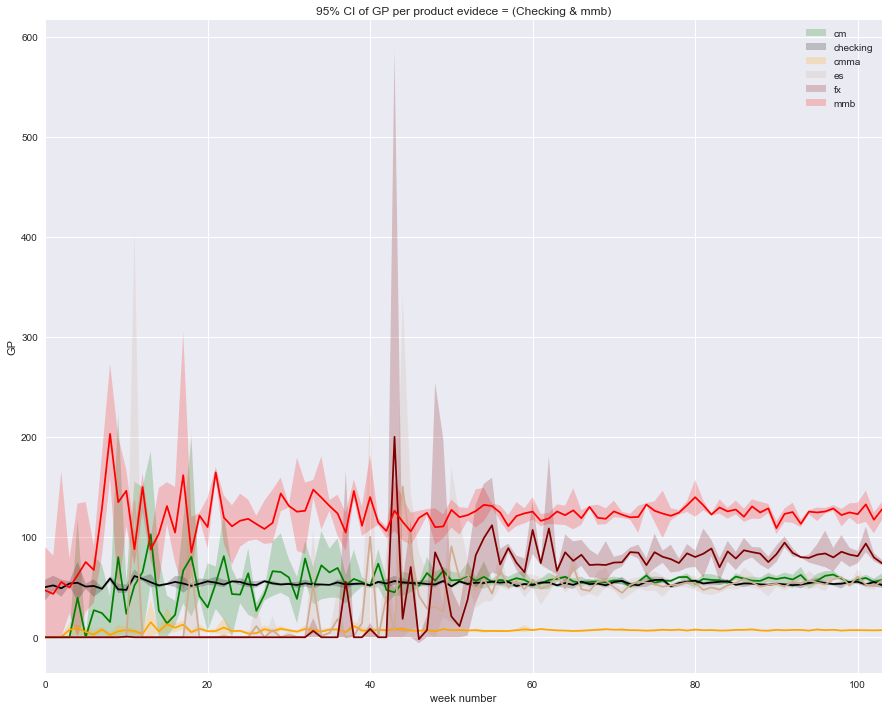

In [343]:
cumulative_cm_rev_per_customer_evidence_checking_mmb_final = []
cumulative_checking_rev_per_customer_evidence_checking_mmb_final = []
cumulative_cmma_rev_per_customer_evidence_checking_mmb_final = []
cumulative_es_rev_per_customer_evidence_checking_mmb_final = []
cumulative_fx_rev_per_customer_evidence_checking_mmb_final = []
cumulative_loc_rev_per_customer_evidence_checking_mmb_final = []
cumulative_mmb_rev_per_customer_evidence_checking_mmb_final = []



for simulation in rev_customer_cm_evidence_checking_mmb:
    cumulative_cm_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_mmb:
    cumulative_checking_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_mmb:
    cumulative_cmma_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_mmb:
    cumulative_es_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_mmb:
    cumulative_fx_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_mmb:
    cumulative_loc_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_mmb:
    cumulative_mmb_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
    
    
#plot
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_mmb_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_mmb_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_mmb_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_mmb_final,value='fx',ci=95,color='maroon')
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_mmb_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & mmb)')

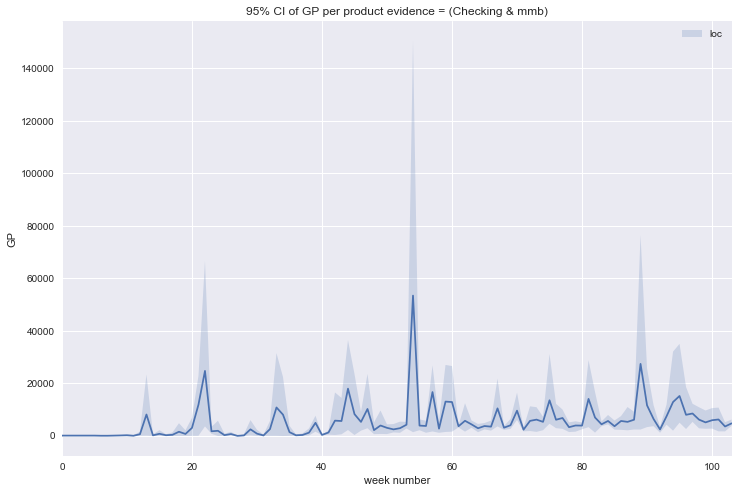

In [344]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_mmb_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & mmb)')

# Finally, starting evidence checking & loc

In [345]:
clients_over_time_per_week_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-mmb/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking")
rev_customer_checking_evidence_checking_loc  = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx")
rev_customer_fx_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_loc =  pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_money_market_bonus_total_weekly_rev")



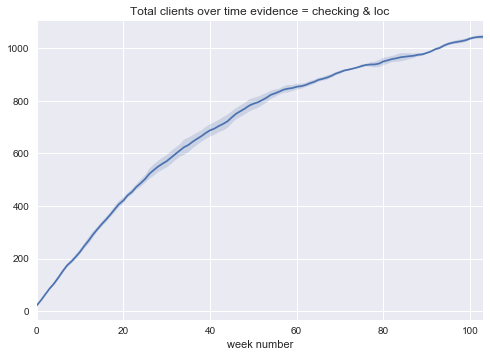

In [346]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_1_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_2_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_loc = []
cumulative_clients_week_1_final_evid_checking_loc = []
cumulative_clients_week_2_final_evid_checking_loc = []
[cumulative_clients_week_0_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[0]]
[cumulative_clients_week_1_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[1]]
[cumulative_clients_week_2_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[2]]
for k,v in cumulative_clients_week_0_evidence_checking_loc.items():
    cumulative_clients_week_0_final_evid_checking_loc.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_loc.items():
    cumulative_clients_week_1_final_evid_checking_loc.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_loc.items():
    cumulative_clients_week_2_final_evid_checking_loc.append(max(v)) 
final_cumulative_clients_evidence_checking_loc = [cumulative_clients_week_0_final_evid_checking_loc
                                        ,cumulative_clients_week_1_final_evid_checking_loc,
                                        cumulative_clients_week_2_final_evid_checking_loc]

#plot it
sns.tsplot(final_cumulative_clients_evidence_checking_loc)
plt.title('Total clients over time evidence = checking & loc')
plt.xlabel('week number')

# Number of clients with each product given evidence = checking and loc

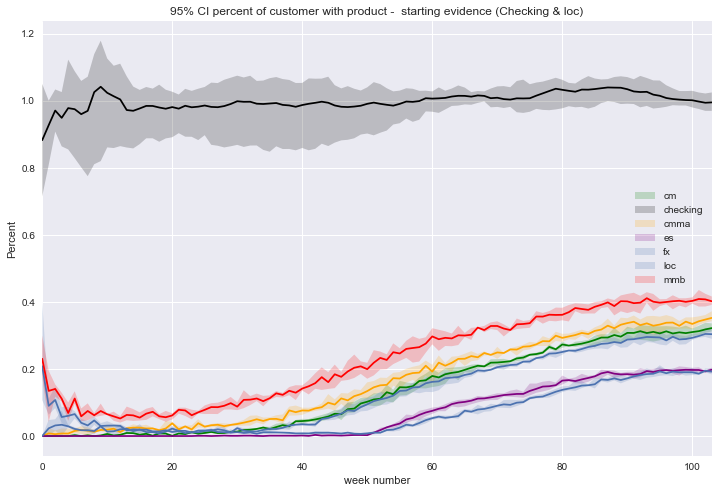

In [347]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_loc_final = []
cumulative_checking_customers_percent_evidence_checking_loc_final = []
cumulative_cmma_customers_percent_evidence_checking_loc_final = []
cumulative_es_customers_percent_evidence_checking_loc_final = []
cumulative_fx_customers_percent_evidence_checking_loc_final = []
cumulative_loc_customers_percent_evidence_checking_loc_final = []
cumulative_mmb_customers_percent_evidence_checking_loc_final = []


for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_fx_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])
    
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_cm_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])
    
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_loc_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])
    
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_checking_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])
    
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_cmma_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])
    
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_es_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])
    
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_mmb_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])
    
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_loc_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_loc_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_loc_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_loc_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_loc_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_loc_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_loc_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & loc)')

# GP per product per customer given evidence = checking loc

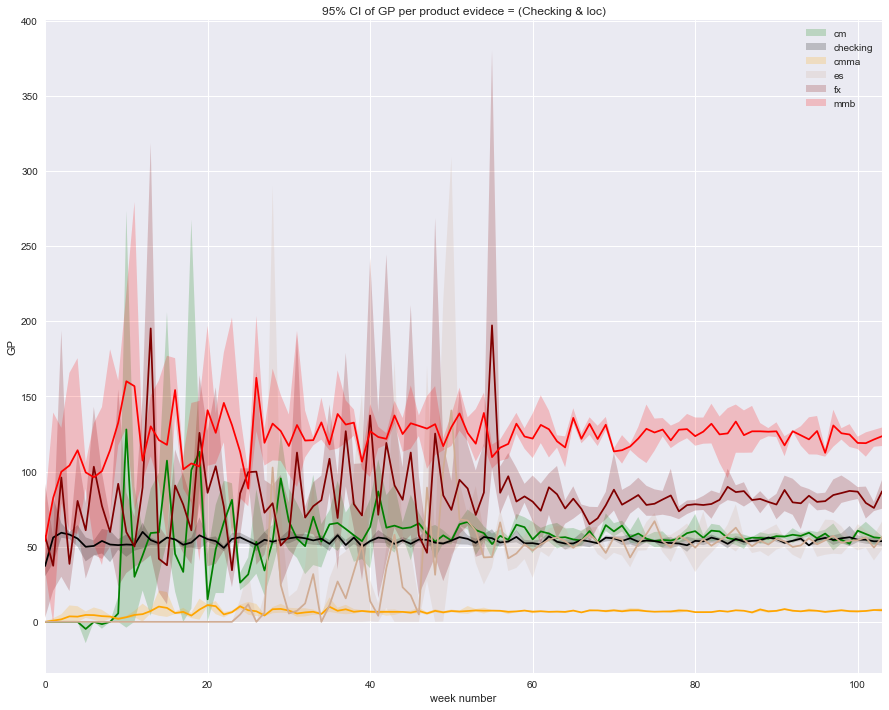

In [351]:
cumulative_cm_rev_per_customer_evidence_checking_loc_final = []
cumulative_checking_rev_per_customer_evidence_checking_loc_final = []
cumulative_cmma_rev_per_customer_evidence_checking_loc_final = []
cumulative_es_rev_per_customer_evidence_checking_loc_final = []
cumulative_fx_rev_per_customer_evidence_checking_loc_final = []
cumulative_loc_rev_per_customer_evidence_checking_loc_final = []
cumulative_mmb_rev_per_customer_evidence_checking_loc_final = []



for simulation in rev_customer_cm_evidence_checking_loc:
    cumulative_cm_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_loc:
    cumulative_checking_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_loc:
    cumulative_cmma_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_loc:
    cumulative_es_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_loc:
    cumulative_fx_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_loc:
    cumulative_loc_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_loc:
    cumulative_mmb_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
    
    
#plot
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_loc_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_loc_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_loc_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_loc_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_loc_final,value='fx',ci=95,color='maroon')
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_loc_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_loc_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & loc)')

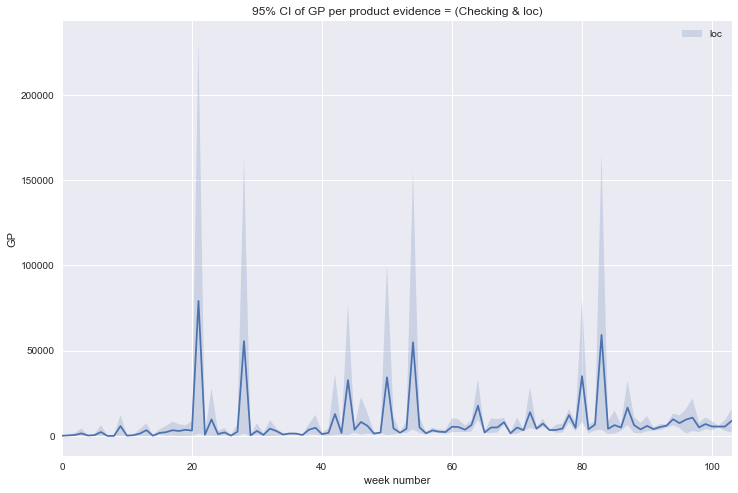

In [352]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_loc_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & loc)')

# Next, plot each products GP against eachother with the given starting evidence

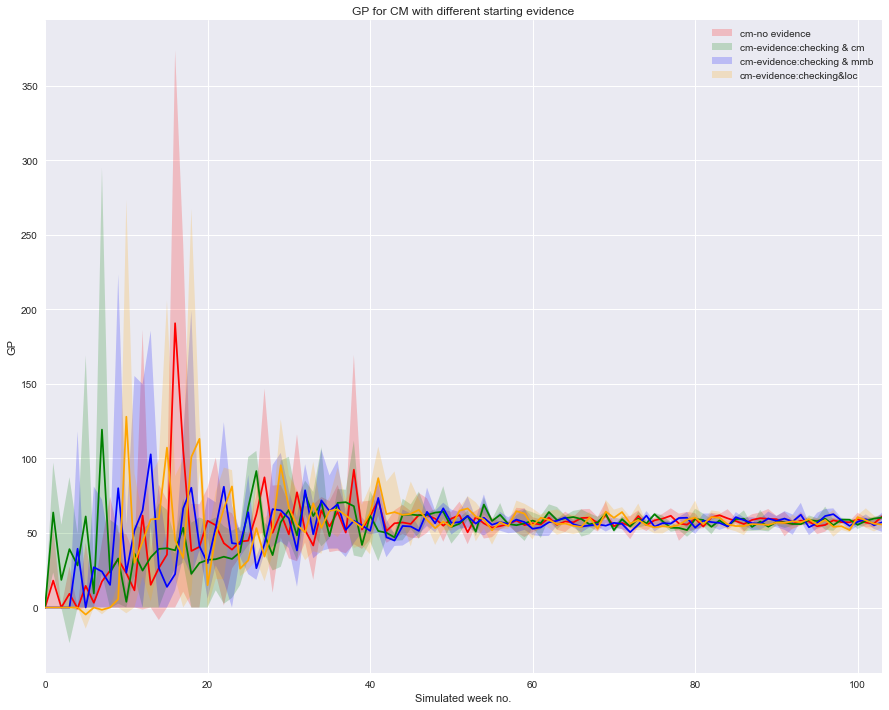

In [377]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'cm-no evidence',color='red', ci=95)
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_cm_final,
           value = 'cm-evidence:checking & cm',color='green', ci=95)
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_mmb_final,
           value = 'cm-evidence:checking & mmb',color='blue', ci=95)
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_loc_final,
           value = 'cm-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cm-no evidence','cm-evidence:checking & cm','cm-evidence:checking & mmb','cm-evidence:checking&loc'])
plt.title('GP for CM with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

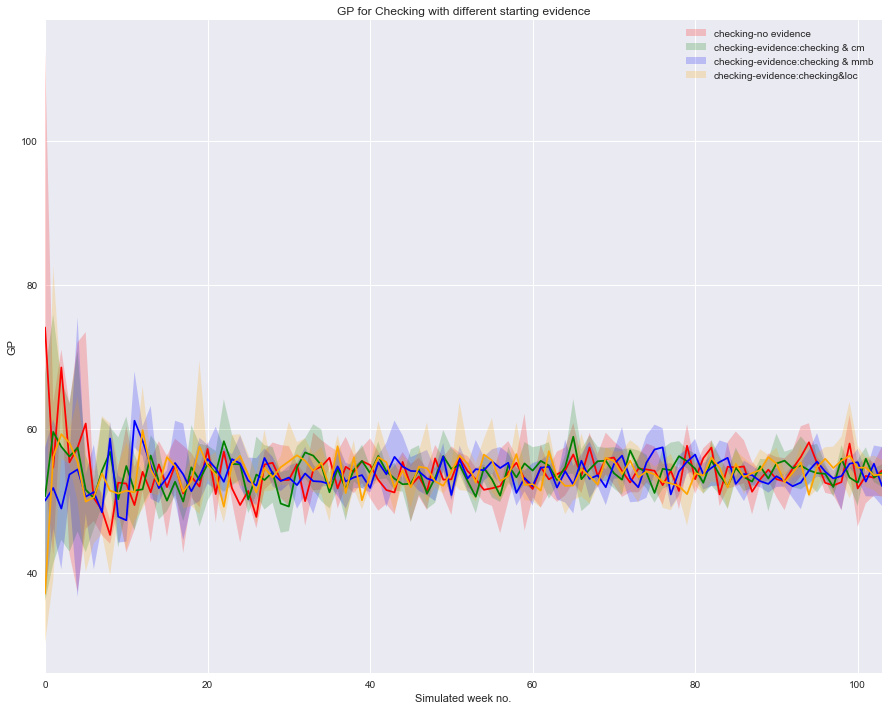

In [380]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_no_evidence_final,value = 'checking-no evidence',color='red', ci=95)
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_evidence_checking_cm_final,
           value = 'checking-evidence:checking & cm',color='green', ci=95)
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_evidence_checking_mmb_final,
           value = 'checking-evidence:checking & mmb',color='blue', ci=95)
#cm
sns.tsplot(data = cumulative_checking_rev_per_customer_evidence_checking_loc_final,
           value = 'checking-evidence:checking&loc',color='orange', ci=95)
plt.legend(['checking-no evidence','checking-evidence:checking & cm','checking-evidence:checking & mmb','checking-evidence:checking&loc'])
plt.title('GP for Checking with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

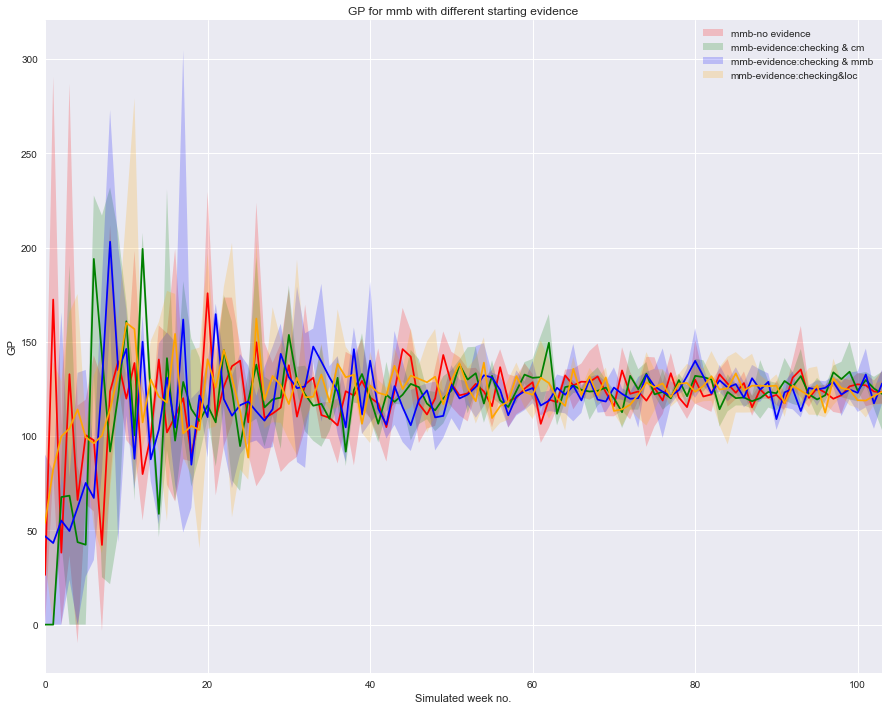

In [381]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_mmb_rev_per_customer_no_evidence_final,value = 'mmb-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_mmb_rev_per_customer_evidence_checking_cm_final,
           value = 'mmb-evidence:checking & cm',color='green', ci=95)
sns.tsplot(data = cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,
           value = 'mmb-evidence:checking & mmb',color='blue', ci=95)

sns.tsplot(data = cumulative_mmb_rev_per_customer_evidence_checking_loc_final,
           value = 'mmb-evidence:checking&loc',color='orange', ci=95)
plt.legend(['mmb-no evidence','mmb-evidence:checking & cm','mmb-evidence:checking & mmb','mmb-evidence:checking&loc'])
plt.title('GP for mmb with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

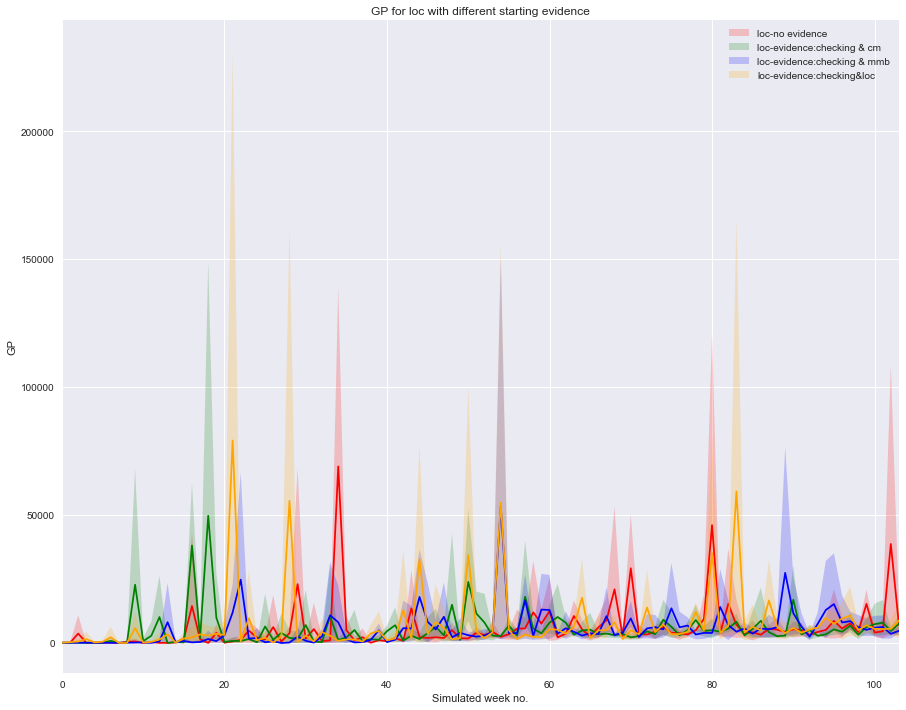

In [382]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_loc_rev_per_customer_no_evidence_final,value = 'loc-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_loc_rev_per_customer_evidence_checking_cm_final,
           value = 'loc-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_loc_rev_per_customer_evidence_checking_mmb_final,
           value = 'loc-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_loc_rev_per_customer_evidence_checking_loc_final,
           value = 'loc-evidence:checking&loc',color='orange', ci=95)
plt.legend(['loc-no evidence','loc-evidence:checking & cm','loc-evidence:checking & mmb','loc-evidence:checking&loc'])
plt.title('GP for loc with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

In [364]:
np.median(cumulative_loc_rev_per_customer_no_evidence_final[0])

2668.9878544153903

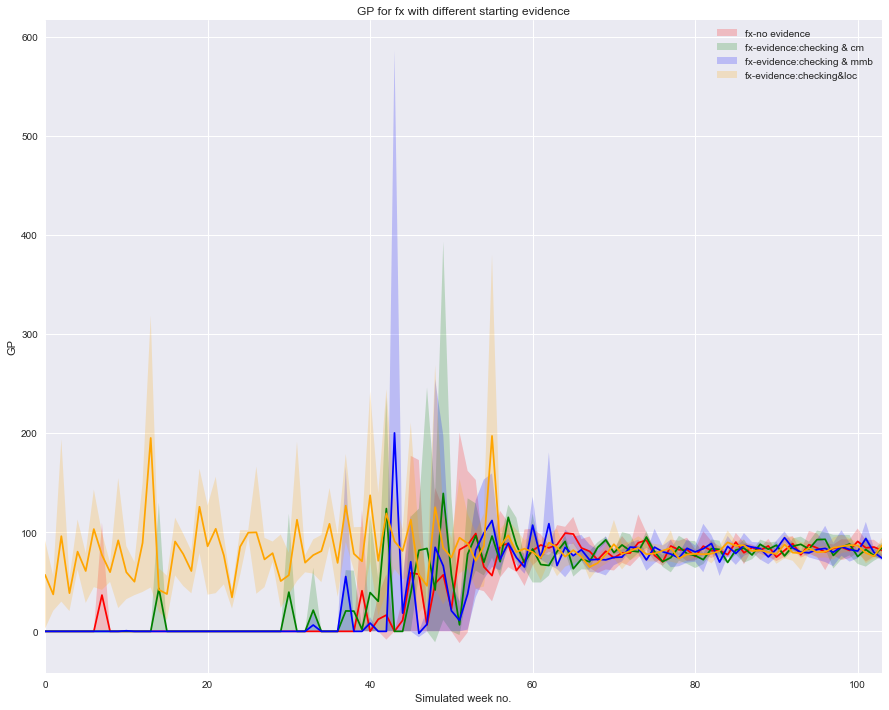

In [383]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_fx_rev_per_customer_no_evidence_final,value = 'fx-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_cm_final,
           value = 'fx-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_mmb_final,
           value = 'fx-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_loc_final,
           value = 'fx-evidence:checking&loc',color='orange', ci=95)
plt.legend(['fx-no evidence','fx-evidence:checking & cm','fx-evidence:checking & mmb','fx-evidence:checking&loc'])
plt.title('GP for fx with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

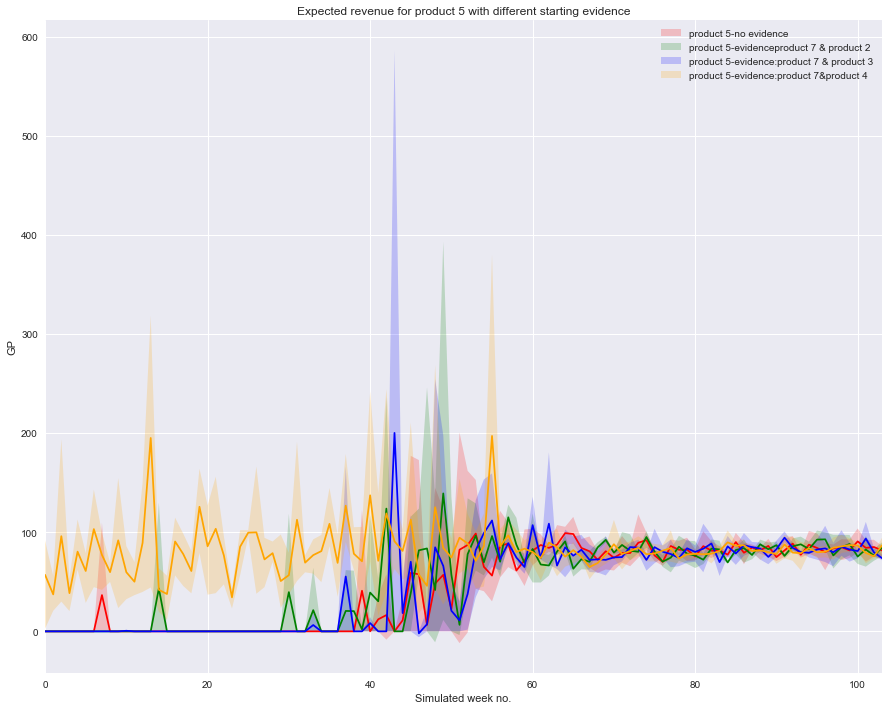

In [396]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_fx_rev_per_customer_no_evidence_final,value = 'product 5-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_cm_final,
           value = 'product 5-evidenceproduct 7 & product 2',color='green', ci=95)
#
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_mmb_final,
           value = 'product 5-evidenceproduct 7 & product 3',color='blue', ci=95)
sns.tsplot(data = cumulative_fx_rev_per_customer_evidence_checking_loc_final,
           value = 'product 5-evidence:product 7 &product 4',color='orange', ci=95)
plt.legend(['product 5-no evidence','product 5-evidenceproduct 7 & product 2','product 5-evidence:product 7 & product 3',
            'product 5-evidence:product 7&product 4'])
plt.title('Expected revenue for product 5 with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

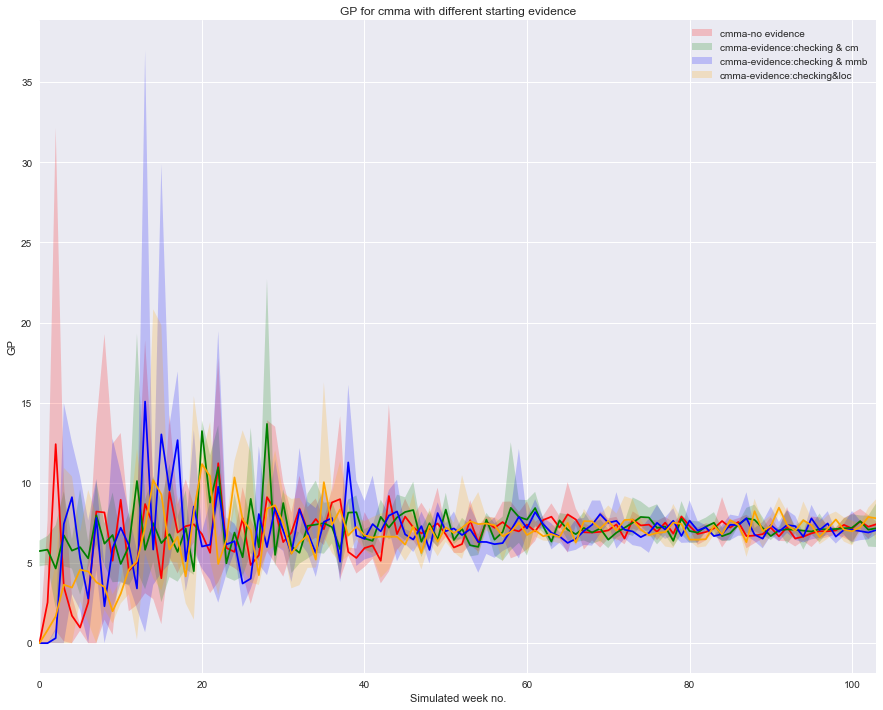

In [384]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_cmma_rev_per_customer_no_evidence_final,value = 'cmma-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_cmma_rev_per_customer_evidence_checking_cm_final,
           value = 'cmma-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,
           value = 'cmma-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_cmma_rev_per_customer_evidence_checking_loc_final,
           value = 'cmma-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cmma-no evidence','cmma-evidence:checking & cm','cmma-evidence:checking & mmb','cmma-evidence:checking&loc'])
plt.title('GP for cmma with different starting evidence')
plt.ylabel('GP')
plt.xlabel('Simulated week no.')

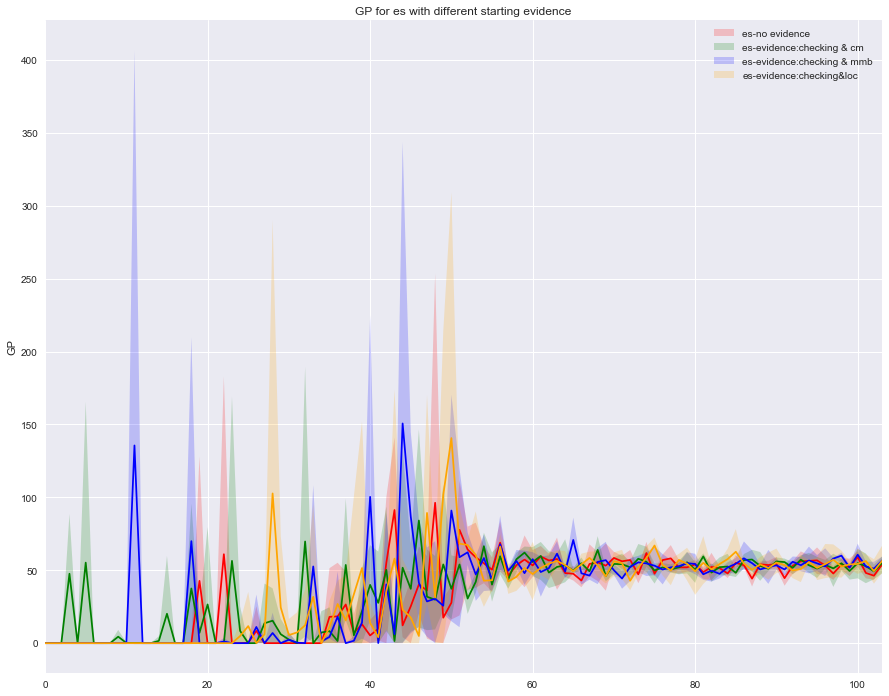

In [371]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_es_rev_per_customer_no_evidence_final,value = 'es-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_es_rev_per_customer_evidence_checking_cm_final,
           value = 'es-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_es_rev_per_customer_evidence_checking_mmb_final,
           value = 'es-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_es_rev_per_customer_evidence_checking_loc_final,
           value = 'es-evidence:checking&loc',color='orange', ci=95)
plt.legend(['es-no evidence','es-evidence:checking & cm','es-evidence:checking & mmb','es-evidence:checking&loc'])
plt.title('GP for es with different starting evidence')
plt.ylabel('GP')

# Next, look at the percent of people with each product for different starting evidence

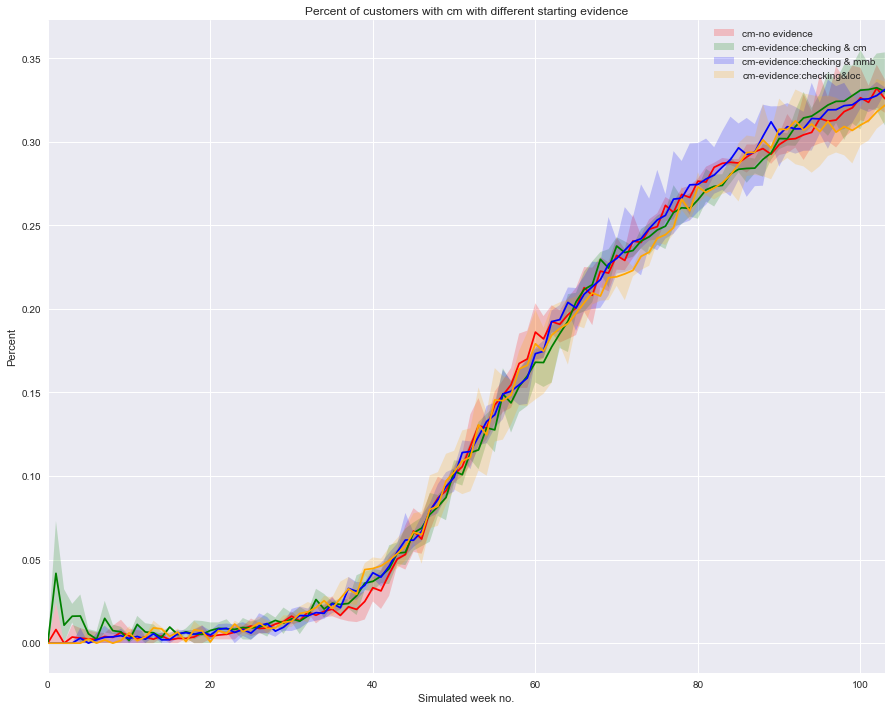

In [385]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'cm-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_cm_final,
           value = 'cm-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_mmb_final,
           value = 'cm-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_loc_final,
           value = 'cm-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cm-no evidence','cm-evidence:checking & cm','cm-evidence:checking & mmb','cm-evidence:checking&loc'])
plt.title('Percent of customers with cm with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

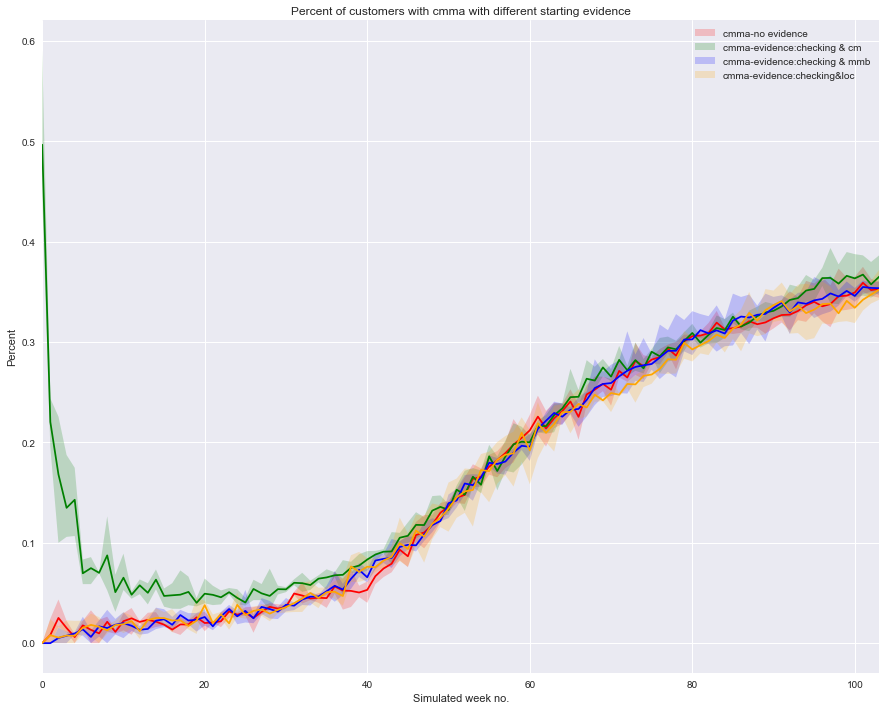

In [386]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_cmma_customers_percent_no_evidence_final,value = 'cmma-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_cmma_customers_percent_evidence_checking_cm_final,
           value = 'cmma-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_cmma_customers_percent_evidence_checking_mmb_final,
           value = 'cmma-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_cmma_customers_percent_evidence_checking_loc_final,
           value = 'cmma-evidence:checking&loc',color='orange', ci=95)
plt.legend(['cmma-no evidence','cmma-evidence:checking & cm','cmma-evidence:checking & mmb','cmma-evidence:checking&loc'])
plt.title('Percent of customers with cmma with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

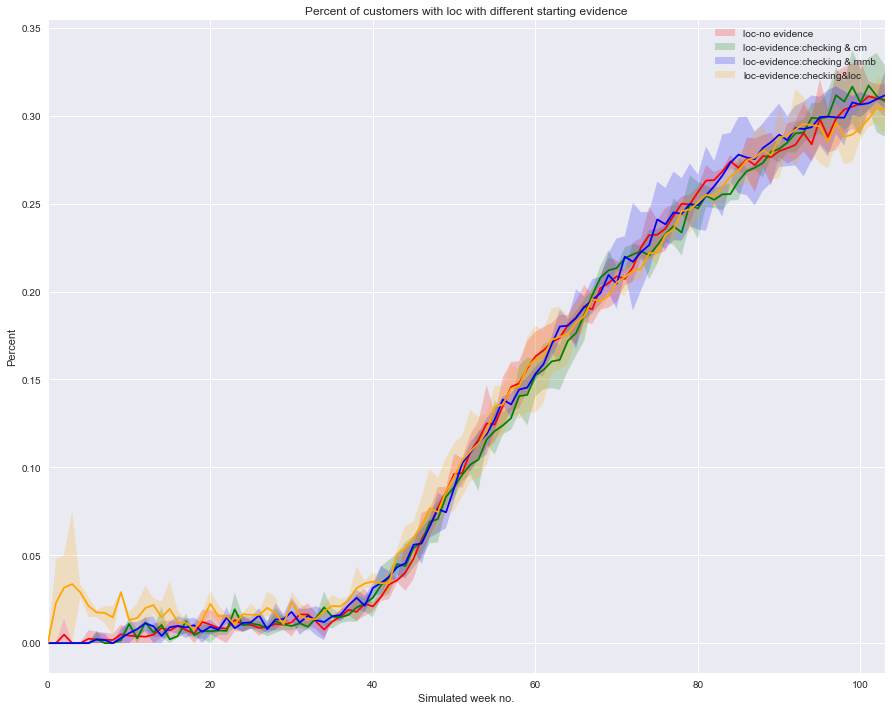

In [387]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_loc_customers_percent_no_evidence_final,value = 'loc-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_loc_customers_percent_evidence_checking_cm_final,
           value = 'loc-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_loc_customers_percent_evidence_checking_mmb_final,
           value = 'loc-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_loc_customers_percent_evidence_checking_loc_final,
           value = 'loc-evidence:checking&loc',color='orange', ci=95)
plt.legend(['loc-no evidence','loc-evidence:checking & cm','loc-evidence:checking & mmb','loc-evidence:checking&loc'])
plt.title('Percent of customers with loc with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

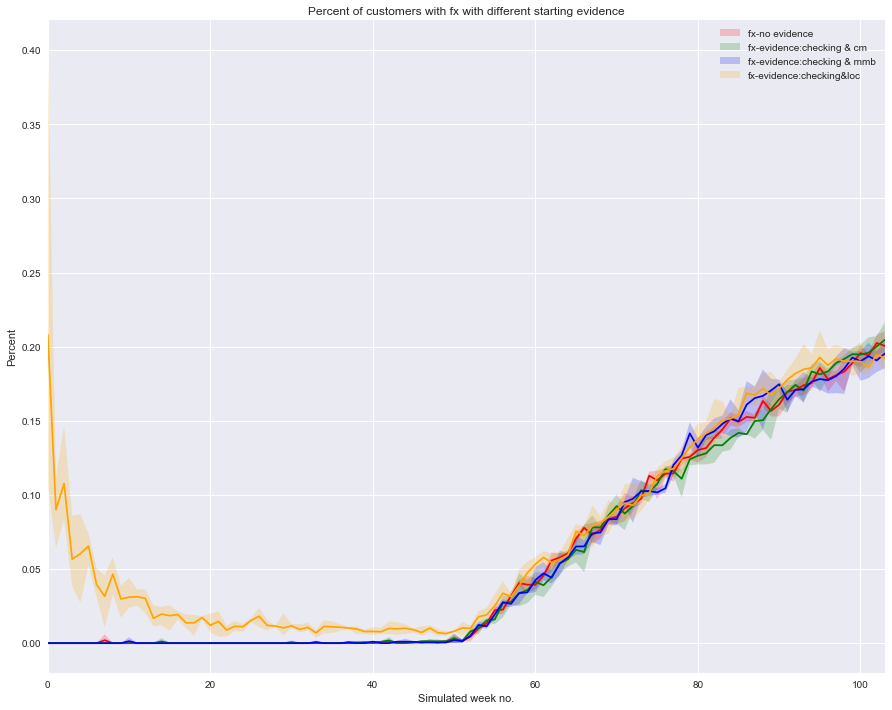

In [388]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_fx_customers_percent_no_evidence_final,value = 'fx-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_fx_customers_percent_evidence_checking_cm_final,
           value = 'fx-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_fx_customers_percent_evidence_checking_mmb_final,
           value = 'fx-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_fx_customers_percent_evidence_checking_loc_final,
           value = 'fx-evidence:checking&loc',color='orange', ci=95)
plt.legend(['fx-no evidence','fx-evidence:checking & cm','fx-evidence:checking & mmb','fx-evidence:checking&loc'])
plt.title('Percent of customers with fx with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

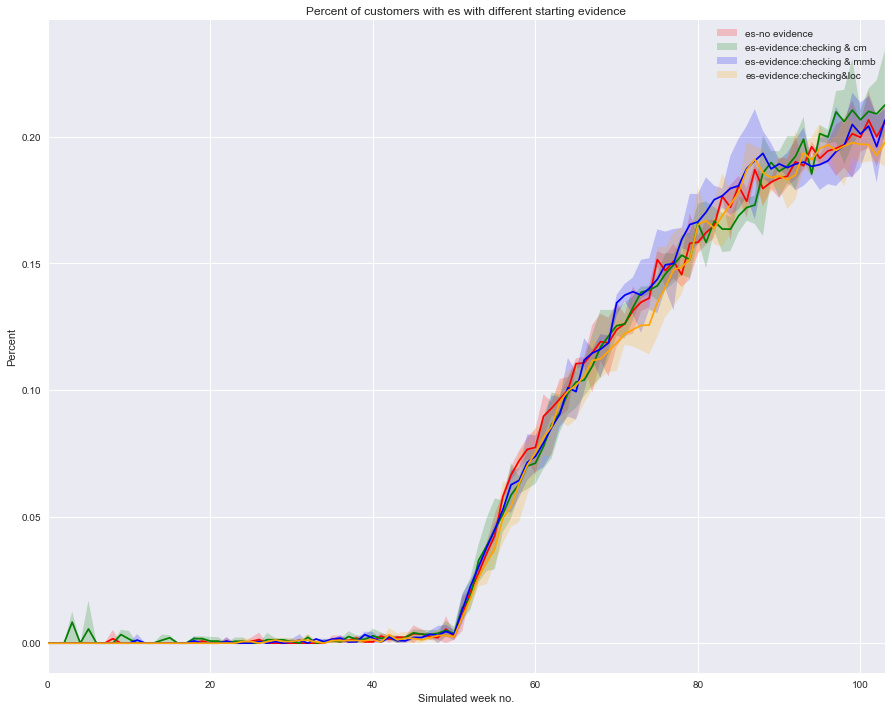

In [389]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_es_customers_percent_no_evidence_final,value = 'es-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_es_customers_percent_evidence_checking_cm_final,
           value = 'es-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_es_customers_percent_evidence_checking_mmb_final,
           value = 'es-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_es_customers_percent_evidence_checking_loc_final,
           value = 'es-evidence:checking&loc',color='orange', ci=95)
plt.legend(['es-no evidence','es-evidence:checking & cm','es-evidence:checking & mmb','es-evidence:checking&loc'])
plt.title('Percent of customers with es with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

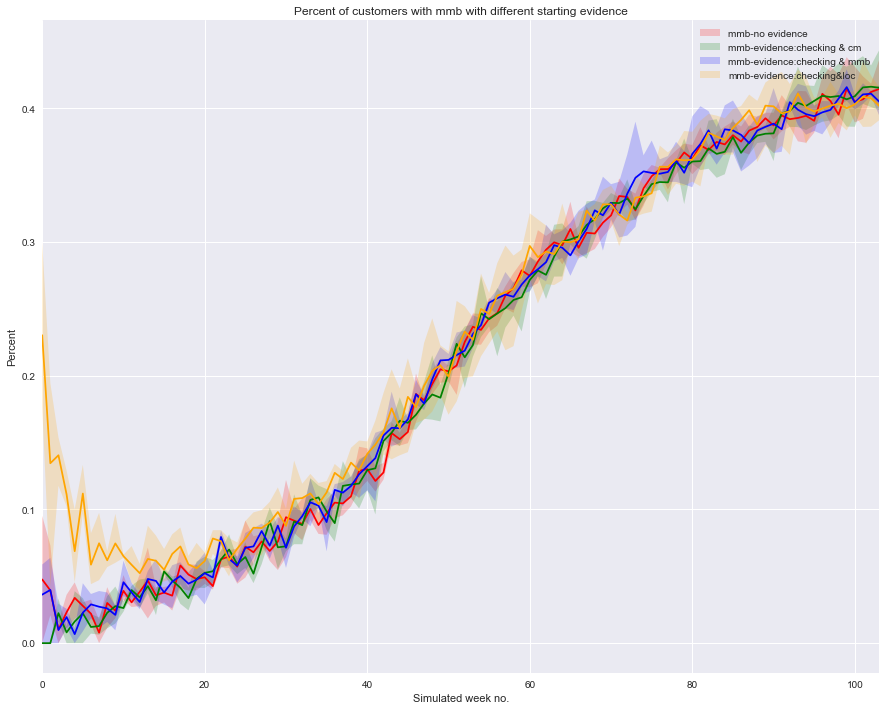

In [390]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_mmb_customers_percent_no_evidence_final,value = 'mmb-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_cm_final,
           value = 'mmb-evidence:checking & cm',color='green', ci=95)
#
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_mmb_final,
           value = 'mmb-evidence:checking & mmb',color='blue', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_loc_final,
           value = 'mmb-evidence:checking&loc',color='orange', ci=95)
plt.legend(['mmb-no evidence','mmb-evidence:checking & cm','mmb-evidence:checking & mmb','mmb-evidence:checking&loc'])
plt.title('Percent of customers with mmb with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

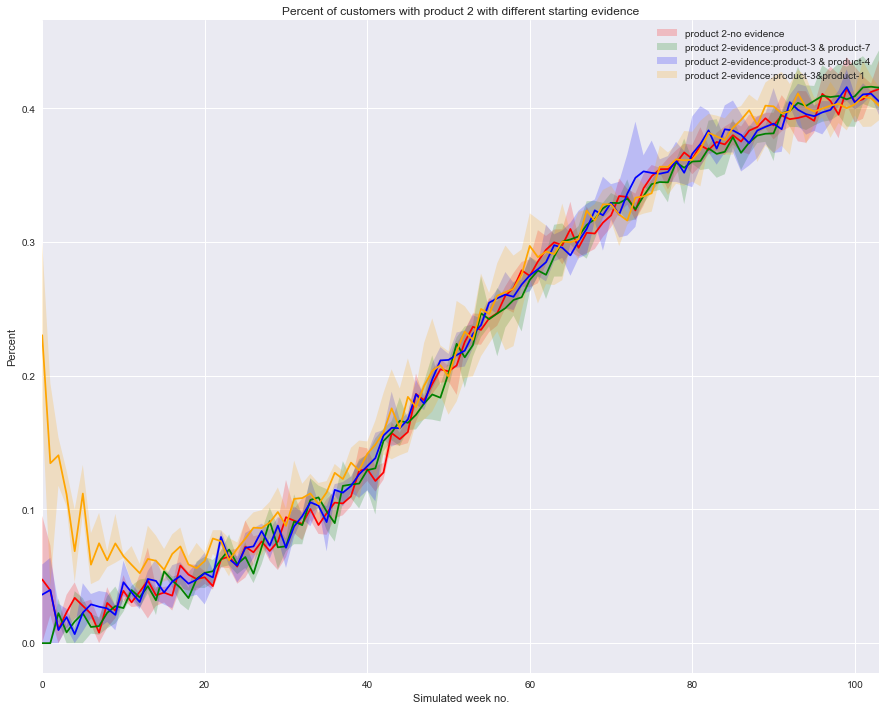

In [392]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.tsplot(data = cumulative_mmb_customers_percent_no_evidence_final,value = 'product 2-no evidence',color='red', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_cm_final,
           value = 'product 2-evidence:product-3 & product-4',color='green', ci=95)
#
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_mmb_final,
           value = 'product 2-evidence:product-3 & product-7',color='blue', ci=95)
sns.tsplot(data = cumulative_mmb_customers_percent_evidence_checking_loc_final,
           value = 'product 2-evidence:product-3&product 1',color='orange', ci=95)
plt.legend(['product 2-no evidence','product 2-evidence:product-3 & product-7','product 2-evidence:product-3 & product-4',
            'product 2-evidence:product-3&product-1'])
plt.title('Percent of customers with product 2 with different starting evidence')
plt.ylabel('Percent')
plt.xlabel('Simulated week no.')

# Finally, calculate the LTV for each product with each given evidence
## First, MMB

In [397]:
def esp_client_lifetime():
        """Draws from a distribution of client lifetimes (in months) from 2013-2016.
        Return the number of weeks that a client will be alive.

        A client needs to be generating revenue for at least three months, and not
        have generated revenue for three months to be considred a
        'client lifetime'. It is possible for a single client to have Multiple
        'client lifetimes' that feed into the parameters for the Exponential
        distribution.

        Multiply the result by 4 to turn months into weeks"""
        exponential_lifetime_parameters = (2.9999999999982676, 11.500665661185888)
        return round(stats.expon(*exponential_lifetime_parameters ).rvs())*4

In [483]:
def get_average_per_time_period(sim1,sim2,sim3,sim4):
    avg_sim1 = []
    avg_sim2 = []
    avg_sim3 = []
    avg_sim4 = []
    for week_n in range(len(sim1[0])):
        avg_sim1.append(np.mean([sim1[0][week_n], sim1[1][week_n], sim1[2][week_n]]))
    for week_n in range(len(sim2[0])):
        avg_sim2.append(np.mean([sim2[0][week_n], sim2[1][week_n], sim2[2][week_n]]))
    for week_n in range(len(sim3[0])):
        avg_sim3.append(np.mean([sim3[0][week_n], sim3[1][week_n], sim3[2][week_n]]))
    for week_n in range(len(sim4[0])):
        avg_sim4.append(np.mean([sim4[0][week_n], sim4[1][week_n], sim4[2][week_n]]))   
    return avg_sim1,avg_sim2,avg_sim3, avg_sim4

In [466]:
cumulative_mmb_customers_percent_evidence_checking_loc_final[0][1]

0.16666666666666666

In [486]:
# Get average GP and percent of customer across simulation for MMB
avg_cust_percent_mmb_no_evidence, avg_cust_percent_mmb_evidence_checking_cm,\
avg_cust_percent_mmb_evidence_checking_mmb, avg_cust_percent_mmb_evidence_checking_loc = \
get_average_per_time_period(cumulative_mmb_customers_percent_no_evidence_final,
                            cumulative_mmb_customers_percent_evidence_checking_cm_final,
                           cumulative_mmb_customers_percent_evidence_checking_mmb_final,
                           cumulative_mmb_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_mmb_no_evidence, avg_weekly_rev_mmb_evidence_checking_cm,\
avg_weekly_rev_mmb_evidence_checking_mmb, avg_weekly_rev_mmb_evidence_checking_loc = \
get_average_per_time_period(cumulative_mmb_rev_per_customer_no_evidence_final,
                            cumulative_mmb_rev_per_customer_evidence_checking_cm_final,
                           cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_mmb_rev_per_customer_evidence_checking_loc_final)






In [569]:
#go throughsimulated time for mmb customers

def ltv(avg_percent1,avg_rev1,avg_percent2,avg_rev2,avg_percent3,avg_rev3,avg_percent4,avg_rev4):
    """Generate the ltv based off the the simulation data for weekly expected GP and perent of customer with product"""
    
    client_lifetimes = []
    # generate 5000 customers
    for _ in range(5000):
        lifetime = esp_client_lifetime()
        if lifetime <104:
            client_lifetimes.append(lifetime)

    total_live_clients = 0
    sim1_rev_weekly = []
    sim2_rev_weekly = []
    sim3_rev_weekly = []
    sim4_rev_weekly = []
    
    for week_n in range(int(max(client_lifetimes)+2)):
        remove_lifetimes = []
        for client_lifetime in client_lifetimes:
            if week_n>client_lifetime:
                remove_lifetimes.append(client_lifetime)


        [client_lifetimes.remove(i) for i in remove_lifetimes]
        total_live_clients = len(client_lifetimes)
        if round(total_live_clients * avg_percent1[week_n]) == 0:
            pass
        else:
            clients1 = round(total_live_clients * avg_percent1[week_n])

            sim1_rev_weekly.append(
                (clients1 * avg_rev1[week_n])/clients1)
        if round(total_live_clients * avg_percent2[week_n]) == 0:
            pass
        else:
            clients2 = round(total_live_clients * avg_percent2[week_n])

            sim2_rev_weekly.append(
                (clients2 *\
                 avg_rev2[week_n])/clients2 )
        if round(total_live_clients * avg_percent3[week_n]) == 0:
            pass
        else:
            clients3 = round(total_live_clients * avg_percent3[week_n])

            sim3_rev_weekly.append(
                (clients3 *\
                 avg_rev3[week_n])/clients3 )
        if round(total_live_clients * avg_percent4[week_n]) == 0:
            pass
        else:
            clients4 = round(total_live_clients * avg_percent4[week_n])

            sim4_rev_weekly.append(
                (clients4 *\
                 avg_rev4[week_n])/clients4 )
    return sum(sim1_rev_weekly),sum(sim2_rev_weekly),sum(sim3_rev_weekly),sum(sim4_rev_weekly)
        

In [572]:
ltv_mmb_no_evidence, ltv_mmb_evidence_checking_cm,ltv_mmb_evidence_checking_mmb, ltv_mmb_evidence_checking_loc  = \
ltv(avg_cust_percent_mmb_no_evidence,avg_weekly_rev_mmb_no_evidence,
   avg_cust_percent_mmb_evidence_checking_cm, avg_weekly_rev_mmb_evidence_checking_cm,
   avg_cust_percent_mmb_evidence_checking_mmb, avg_weekly_rev_mmb_evidence_checking_mmb,
   avg_cust_percent_mmb_evidence_checking_loc, avg_weekly_rev_mmb_evidence_checking_loc)

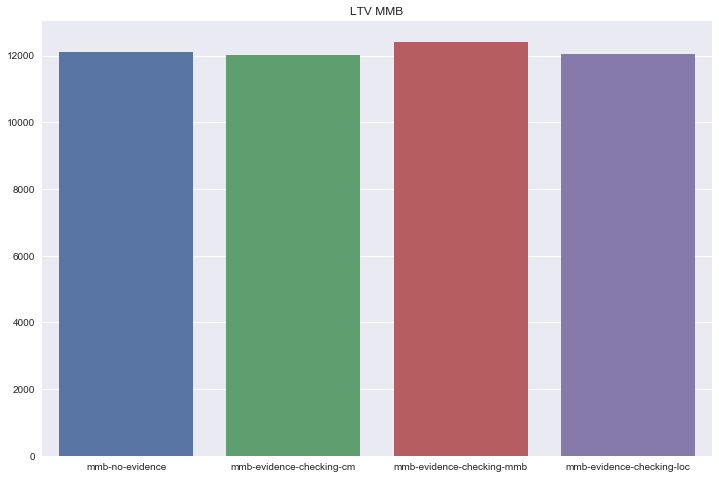

In [576]:
plt.figure(figsize=(12,8))
plt.title('LTV MMB')
sns.barplot(x=['mmb-no-evidence','mmb-evidence-checking-cm','mmb-evidence-checking-mmb','mmb-evidence-checking-loc'],
           y=[ltv_mmb_no_evidence,ltv_mmb_evidence_checking_cm, ltv_mmb_evidence_checking_loc,
              ltv_mmb_evidence_checking_mmb])

In [584]:
print('mmb no evidence',ltv_mmb_no_evidence,'mmb evidece = checking cm',ltv_mmb_evidence_checking_cm, 
      'ltv mmb evidence checking loc',ltv_mmb_evidence_checking_loc,
           'ltv mmb evidence checking mmb',   ltv_mmb_evidence_checking_mmb)

mmb no evidence 12117.4418515 mmb evidece = checking cm 12032.8505892 ltv mmb evidence checking loc 12420.7462931 ltv mmb evidence checking mmb 12059.8490032


## Next, checking

In [577]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_checking_no_evidence, avg_cust_percent_checking_evidence_checking_cm,\
avg_cust_percent_checking_evidence_checking_mmb, avg_cust_percent_checking_evidence_checking_loc = \
get_average_per_time_period(cumulative_checking_customers_percent_no_evidence_final,
                            cumulative_checking_customers_percent_evidence_checking_cm_final,
                           cumulative_checking_customers_percent_evidence_checking_mmb_final,
                           cumulative_checking_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_checking_no_evidence, avg_weekly_rev_checking_evidence_checking_cm,\
avg_weekly_rev_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_loc = \
get_average_per_time_period(cumulative_checking_rev_per_customer_no_evidence_final,
                            cumulative_checking_rev_per_customer_evidence_checking_cm_final,
                           cumulative_checking_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_checking_rev_per_customer_evidence_checking_loc_final)






In [579]:
ltv_checking_no_evidence, ltv_checking_evidence_checking_cm,ltv_checking_evidence_checking_mmb, ltv_checking_evidence_checking_loc  = \
ltv(avg_cust_percent_checking_no_evidence,avg_weekly_rev_checking_no_evidence,
   avg_cust_percent_checking_evidence_checking_cm, avg_weekly_rev_checking_evidence_checking_cm,
   avg_cust_percent_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_mmb,
   avg_cust_percent_checking_evidence_checking_loc, avg_weekly_rev_checking_evidence_checking_loc)

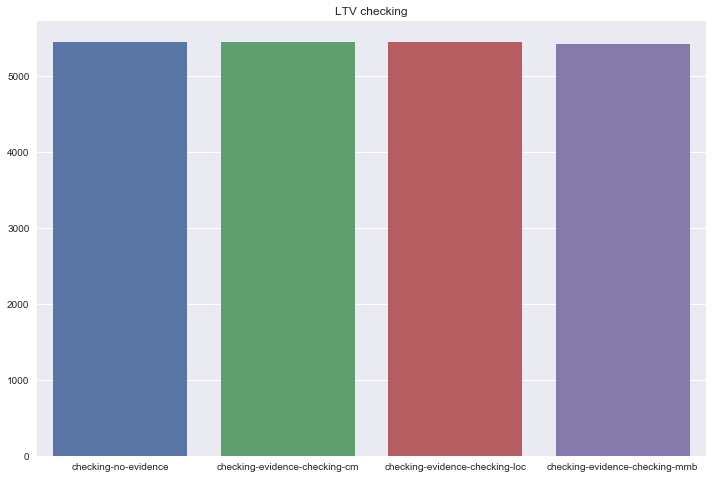

In [599]:
plt.figure(figsize=(12,8))
plt.title('LTV checking')
sns.barplot(x=['checking-no-evidence','checking-evidence-checking-cm','checking-evidence-checking-loc','checking-evidence-checking-mmb'],
           y=[ltv_checking_no_evidence,ltv_checking_evidence_checking_cm, ltv_checking_evidence_checking_loc,
              ltv_checking_evidence_checking_mmb])

In [583]:
print(ltv_checking_no_evidence,ltv_checking_evidence_checking_cm, ltv_checking_evidence_checking_loc,
              ltv_checking_evidence_checking_mmb)

5449.80238092 5447.45460061 5438.69631046 5423.56504024


# Next, CM

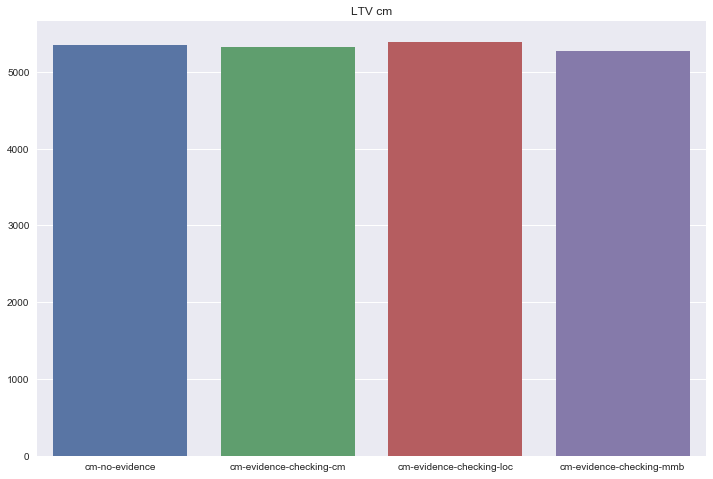

In [598]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_cm_no_evidence, avg_cust_percent_cm_evidence_checking_cm,\
avg_cust_percent_cm_evidence_checking_mmb, avg_cust_percent_cm_evidence_checking_loc = \
get_average_per_time_period(cumulative_cm_customers_percent_no_evidence_final,
                            cumulative_cm_customers_percent_evidence_checking_cm_final,
                           cumulative_cm_customers_percent_evidence_checking_mmb_final,
                           cumulative_cm_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_cm_no_evidence, avg_weekly_rev_cm_evidence_checking_cm,\
avg_weekly_rev_cm_evidence_checking_mmb, avg_weekly_rev_cm_evidence_checking_loc = \
get_average_per_time_period(cumulative_cm_rev_per_customer_no_evidence_final,
                            cumulative_cm_rev_per_customer_evidence_checking_cm_final,
                           cumulative_cm_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_cm_rev_per_customer_evidence_checking_loc_final)




ltv_cm_no_evidence, ltv_cm_evidence_checking_cm,ltv_cm_evidence_checking_mmb, ltv_cm_evidence_checking_loc  = \
ltv(avg_cust_percent_cm_no_evidence,avg_weekly_rev_cm_no_evidence,
   avg_cust_percent_cm_evidence_checking_cm, avg_weekly_rev_cm_evidence_checking_cm,
   avg_cust_percent_cm_evidence_checking_mmb, avg_weekly_rev_cm_evidence_checking_mmb,
   avg_cust_percent_cm_evidence_checking_loc, avg_weekly_rev_cm_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV cm')
sns.barplot(x=['cm-no-evidence','cm-evidence-checking-cm','cm-evidence-checking-loc','cm-evidence-checking-mmb'],
           y=[ltv_cm_no_evidence,ltv_cm_evidence_checking_cm, ltv_cm_evidence_checking_loc,
              ltv_cm_evidence_checking_mmb])

In [587]:
print('ltv cm no evidence',ltv_cm_no_evidence,'cm evidece = checking cm',ltv_cm_evidence_checking_cm, 
      'ltv cm evidence=checking loc',ltv_cm_evidence_checking_loc,
           'ltv cm evidence =checking mmb',   ltv_cm_evidence_checking_mmb)

ltv cm no evidence 5347.77308068 cm evidece = checking cm 5328.29858067 ltv cm evidence=checking loc 5395.19756077 ltv cm evidence =checking mmb 5274.65381907


# Next, FX

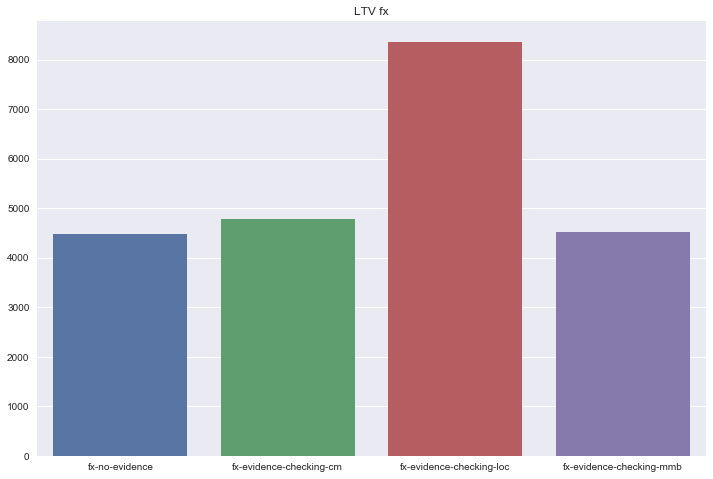

In [597]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_fx_no_evidence, avg_cust_percent_fx_evidence_checking_cm,\
avg_cust_percent_fx_evidence_checking_mmb, avg_cust_percent_fx_evidence_checking_loc = \
get_average_per_time_period(cumulative_fx_customers_percent_no_evidence_final,
                            cumulative_fx_customers_percent_evidence_checking_cm_final,
                           cumulative_fx_customers_percent_evidence_checking_mmb_final,
                           cumulative_fx_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_fx_no_evidence, avg_weekly_rev_fx_evidence_checking_cm,\
avg_weekly_rev_fx_evidence_checking_mmb, avg_weekly_rev_fx_evidence_checking_loc = \
get_average_per_time_period(cumulative_fx_rev_per_customer_no_evidence_final,
                            cumulative_fx_rev_per_customer_evidence_checking_cm_final,
                           cumulative_fx_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_fx_rev_per_customer_evidence_checking_loc_final)




ltv_fx_no_evidence, ltv_fx_evidence_checking_cm,ltv_fx_evidence_checking_mmb, ltv_fx_evidence_checking_loc  = \
ltv(avg_cust_percent_fx_no_evidence,avg_weekly_rev_fx_no_evidence,
   avg_cust_percent_fx_evidence_checking_cm, avg_weekly_rev_fx_evidence_checking_cm,
   avg_cust_percent_fx_evidence_checking_mmb, avg_weekly_rev_fx_evidence_checking_mmb,
   avg_cust_percent_fx_evidence_checking_loc, avg_weekly_rev_fx_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV fx')
sns.barplot(x=['fx-no-evidence','fx-evidence-checking-cm','fx-evidence-checking-loc','fx-evidence-checking-mmb'],
           y=[ltv_fx_no_evidence,ltv_fx_evidence_checking_cm, ltv_fx_evidence_checking_loc,
              ltv_fx_evidence_checking_mmb])

In [589]:
print('ltv fx no evidence',ltv_fx_no_evidence,'fx evidece = checking cm',ltv_fx_evidence_checking_cm, 
      'ltv fx evidence=checking loc',ltv_fx_evidence_checking_loc,
           'ltv fx evidence =checking mmb',   ltv_fx_evidence_checking_mmb)

ltv fx no evidence 4472.48830445 fx evidece = checking cm 4784.52426541 ltv fx evidence=checking loc 8361.52751472 ltv fx evidence =checking mmb 4521.47101207


## Next, checking

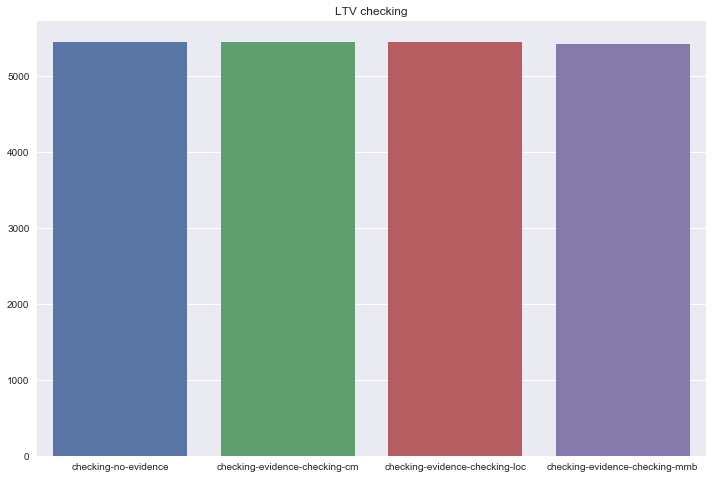

In [596]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_checking_no_evidence, avg_cust_percent_checking_evidence_checking_cm,\
avg_cust_percent_checking_evidence_checking_mmb, avg_cust_percent_checking_evidence_checking_loc = \
get_average_per_time_period(cumulative_checking_customers_percent_no_evidence_final,
                            cumulative_checking_customers_percent_evidence_checking_cm_final,
                           cumulative_checking_customers_percent_evidence_checking_mmb_final,
                           cumulative_checking_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_checking_no_evidence, avg_weekly_rev_checking_evidence_checking_cm,\
avg_weekly_rev_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_loc = \
get_average_per_time_period(cumulative_checking_rev_per_customer_no_evidence_final,
                            cumulative_checking_rev_per_customer_evidence_checking_cm_final,
                           cumulative_checking_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_checking_rev_per_customer_evidence_checking_loc_final)




ltv_checking_no_evidence, ltv_checking_evidence_checking_cm,ltv_checking_evidence_checking_mmb, ltv_checking_evidence_checking_loc  = \
ltv(avg_cust_percent_checking_no_evidence,avg_weekly_rev_checking_no_evidence,
   avg_cust_percent_checking_evidence_checking_cm, avg_weekly_rev_checking_evidence_checking_cm,
   avg_cust_percent_checking_evidence_checking_mmb, avg_weekly_rev_checking_evidence_checking_mmb,
   avg_cust_percent_checking_evidence_checking_loc, avg_weekly_rev_checking_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV checking')
sns.barplot(x=['checking-no-evidence','checking-evidence-checking-cm','checking-evidence-checking-loc',
               'checking-evidence-checking-mmb'],
           y=[ltv_checking_no_evidence,ltv_checking_evidence_checking_cm, ltv_checking_evidence_checking_loc,
              ltv_checking_evidence_checking_mmb])

In [593]:
print('ltv checking no evidence',ltv_checking_no_evidence,'checking evidece = checking cm',ltv_checking_evidence_checking_cm, 
      'ltv checking evidence=checking loc',ltv_checking_evidence_checking_loc,
           'ltv checking evidence =checking mmb',   ltv_checking_evidence_checking_mmb)

ltv checking no evidence 5449.80238092 checking evidece = checking cm 5447.45460061 ltv checking evidence=checking loc 5438.69631046 ltv checking evidence =checking mmb 5423.56504024


## Next, loc

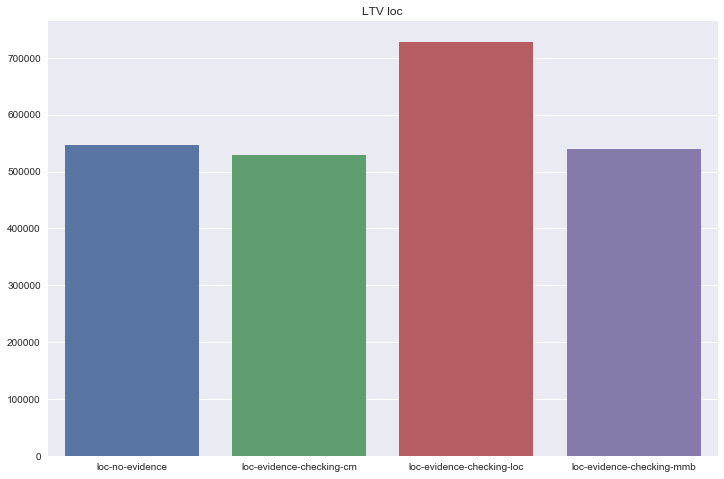

In [595]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_loc_no_evidence, avg_cust_percent_loc_evidence_checking_cm,\
avg_cust_percent_loc_evidence_checking_mmb, avg_cust_percent_loc_evidence_checking_loc = \
get_average_per_time_period(cumulative_loc_customers_percent_no_evidence_final,
                            cumulative_loc_customers_percent_evidence_checking_cm_final,
                           cumulative_loc_customers_percent_evidence_checking_mmb_final,
                           cumulative_loc_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_loc_no_evidence, avg_weekly_rev_loc_evidence_checking_cm,\
avg_weekly_rev_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_loc = \
get_average_per_time_period(cumulative_loc_rev_per_customer_no_evidence_final,
                            cumulative_loc_rev_per_customer_evidence_checking_cm_final,
                           cumulative_loc_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_loc_rev_per_customer_evidence_checking_loc_final)




ltv_loc_no_evidence, ltv_loc_evidence_checking_cm,ltv_loc_evidence_checking_mmb, ltv_loc_evidence_checking_loc  = \
ltv(avg_cust_percent_loc_no_evidence,avg_weekly_rev_loc_no_evidence,
   avg_cust_percent_loc_evidence_checking_cm, avg_weekly_rev_loc_evidence_checking_cm,
   avg_cust_percent_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_mmb,
   avg_cust_percent_loc_evidence_checking_loc, avg_weekly_rev_loc_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV loc')
sns.barplot(x=['loc-no-evidence','loc-evidence-checking-cm','loc-evidence-checking-loc','loc-evidence-checking-mmb'],
           y=[ltv_loc_no_evidence,ltv_loc_evidence_checking_cm, ltv_loc_evidence_checking_loc,
              ltv_loc_evidence_checking_mmb])

## Next, CMMA

In [ ]:
# Get average GP and percent of customer across simulation for checking
avg_cust_percent_loc_no_evidence, avg_cust_percent_loc_evidence_checking_cm,\
avg_cust_percent_loc_evidence_checking_mmb, avg_cust_percent_loc_evidence_checking_loc = \
get_average_per_time_period(cumulative_loc_customers_percent_no_evidence_final,
                            cumulative_loc_customers_percent_evidence_checking_cm_final,
                           cumulative_loc_customers_percent_evidence_checking_mmb_final,
                           cumulative_loc_customers_percent_evidence_checking_loc_final)

avg_weekly_rev_loc_no_evidence, avg_weekly_rev_loc_evidence_checking_cm,\
avg_weekly_rev_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_loc = \
get_average_per_time_period(cumulative_loc_rev_per_customer_no_evidence_final,
                            cumulative_loc_rev_per_customer_evidence_checking_cm_final,
                           cumulative_loc_rev_per_customer_evidence_checking_mmb_final,
                           cumulative_loc_rev_per_customer_evidence_checking_loc_final)




ltv_loc_no_evidence, ltv_loc_evidence_checking_cm,ltv_loc_evidence_checking_mmb, ltv_loc_evidence_checking_loc  = \
ltv(avg_cust_percent_loc_no_evidence,avg_weekly_rev_loc_no_evidence,
   avg_cust_percent_loc_evidence_checking_cm, avg_weekly_rev_loc_evidence_checking_cm,
   avg_cust_percent_loc_evidence_checking_mmb, avg_weekly_rev_loc_evidence_checking_mmb,
   avg_cust_percent_loc_evidence_checking_loc, avg_weekly_rev_loc_evidence_checking_loc)


plt.figure(figsize=(12,8))
plt.title('LTV loc')
sns.barplot(x=['loc-no-evidence','loc-evidence-checking-cm','loc-evidence-checking-loc','loc-evidence-checking-mmb'],
           y=[ltv_loc_no_evidence,ltv_loc_evidence_checking_cm, ltv_loc_evidence_checking_loc,
              ltv_loc_evidence_checking_mmb])